In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dftest=pd.read_csv("MNIST-1/test.csv").values
dftrain=pd.read_csv("MNIST-1/train.csv").values

In [3]:
xtest=dftest[:,1:]

In [4]:
xtest.shape

(9999, 784)

In [5]:
ytest=dftest[:,-1]

In [6]:
ytest.shape

(9999,)

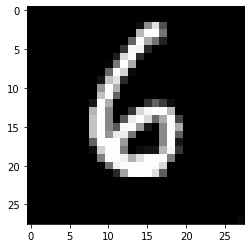

In [7]:
xtest=xtest.reshape(9999,28,28)
plt.imshow(xtest[90],cmap='gray')
plt.show()

In [8]:
ytest[90]

6

In [9]:
x=xtest.reshape(-1,28*28)
y=ytest

In [10]:
x.shape

(9999, 784)

In [11]:
y.shape

(9999,)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
x_=sc.fit_transform(x)

In [15]:
x_.shape

(9999, 784)

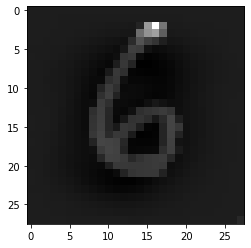

In [16]:
plt.imshow(x_[90].reshape(28,28),cmap='gray')
plt.show()

## Sklearn PCA 

In [18]:
from sklearn.decomposition import PCA

In [20]:
pca=PCA(n_components=2)

In [21]:
z_pca=pca.fit_transform(x_)

In [23]:
z_pca.shape

(9999, 2)

In [24]:
z_pca

array([[ 2.93662552, -8.7118102 ],
       [-7.29271322, -4.17059376],
       [ 8.79687495,  0.17701521],
       ...,
       [-5.03650931,  1.37926662],
       [-1.40965647, -4.14546436],
       [13.10970074, -3.94687533]])

In [27]:
pca.explained_variance_

array([41.48000836, 28.51394411])

## Custom PCA 

In [28]:
covar=np.dot(x_.T,x_)

In [29]:
covar.shape

(784, 784)

In [30]:
from numpy.linalg import svd

In [31]:
U, S, V=svd(covar)

In [32]:
ured=U[:,:2]

In [33]:
ured.shape

(784, 2)

In [34]:
z=np.dot(x_,ured)

In [35]:
z.shape

(9999, 2)

In [36]:
z

array([[ -2.93685123,   8.71441055],
       [  7.29270171,   4.17056848],
       [ -8.79695634,  -0.17646742],
       ...,
       [  5.03652778,  -1.3791325 ],
       [  1.40966729,   4.14640895],
       [-13.10976267,   3.94665456]])

In [37]:
new_dataset=np.hstack((z,y.reshape(-1,1)))

In [38]:
dataframe=pd.DataFrame(new_dataset,columns=["PCA1","PCA2","LABEL"])

In [39]:
dataframe.head()

,PCA1,PCA2,LABEL
0,-2.936851,8.714411,2.0
1,7.292702,4.170568,1.0
2,-8.796956,-0.176467,0.0
3,0.102361,-6.273082,4.0
4,8.087872,4.395098,1.0


In [40]:
import seaborn as sns

<Figure size 1080x1080 with 0 Axes>

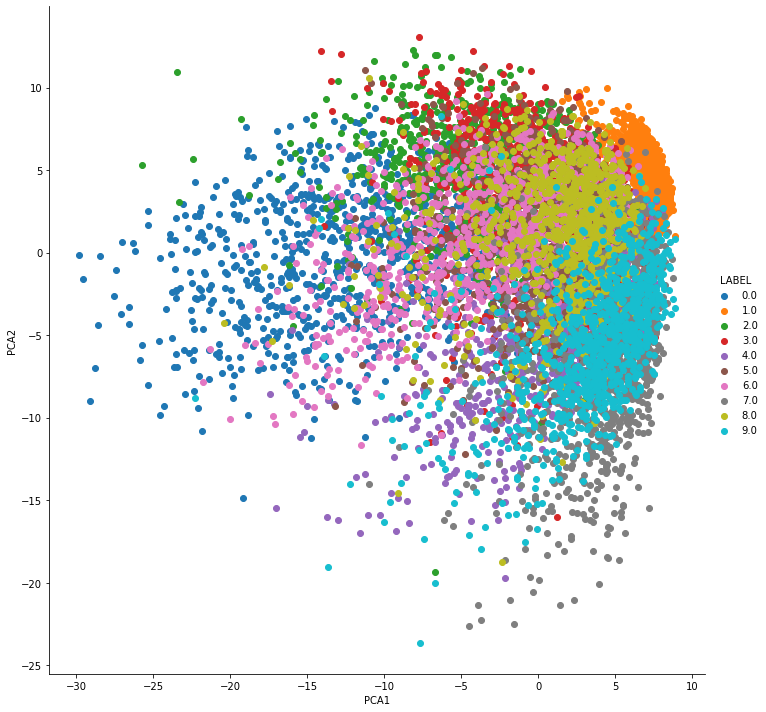

In [42]:
plt.figure(figsize=(15,15))
fg=sns.FacetGrid(dataframe,hue="LABEL",height=10)
fg.map(plt.scatter,"PCA1","PCA2")
fg.add_legend()
plt.show()

### PCA with 784

In [43]:
pca=PCA()

In [44]:
z_pca=pca.fit_transform(x_)

In [45]:
z_pca.shape

(9999, 784)

In [46]:
pca.explained_variance_

array([4.14800084e+01, 2.85139444e+01, 2.70437095e+01, 2.15870578e+01,
       1.85430031e+01, 1.61156184e+01, 1.36777741e+01, 1.25769451e+01,
       1.11734483e+01, 1.01387069e+01, 9.83610485e+00, 8.76597829e+00,
       8.38985903e+00, 7.98152982e+00, 7.65065241e+00, 7.31625636e+00,
       6.90116002e+00, 6.64257332e+00, 6.32796207e+00, 6.08954397e+00,
       5.94201205e+00, 5.79331923e+00, 5.66555845e+00, 5.51623230e+00,
       5.25493358e+00, 5.15785650e+00, 5.05692561e+00, 4.90153611e+00,
       4.73621075e+00, 4.56615690e+00, 4.46749601e+00, 4.37068104e+00,
       4.32398254e+00, 4.15654594e+00, 4.03757471e+00, 3.95921175e+00,
       3.88886208e+00, 3.82968398e+00, 3.77885112e+00, 3.69420225e+00,
       3.68702579e+00, 3.66159442e+00, 3.56734714e+00, 3.47339858e+00,
       3.42887756e+00, 3.33536201e+00, 3.33135627e+00, 3.26825816e+00,
       3.19939605e+00, 3.13940106e+00, 3.08213093e+00, 3.03629494e+00,
       2.97891696e+00, 2.94137309e+00, 2.89956523e+00, 2.83098764e+00,
      

In [48]:
cum_var_explained=np.cumsum(pca.explained_variance_ratio_)

In [49]:
cum_var_explained

array([0.0619968 , 0.10461428, 0.14503432, 0.17729874, 0.20501346,
       0.22910017, 0.24954323, 0.26834096, 0.28504101, 0.30019451,
       0.31489574, 0.32799754, 0.34053718, 0.35246652, 0.36390133,
       0.37483635, 0.38515095, 0.39507906, 0.40453696, 0.4136385 ,
       0.42251955, 0.43117835, 0.4396462 , 0.44789086, 0.45574499,
       0.46345402, 0.47101219, 0.47833812, 0.48541695, 0.49224161,
       0.49891882, 0.50545132, 0.51191403, 0.51812648, 0.52416111,
       0.53007863, 0.53589099, 0.54161491, 0.54726285, 0.55278428,
       0.55829497, 0.56376766, 0.56909949, 0.57429089, 0.57941576,
       0.58440085, 0.58937996, 0.59426476, 0.59904664, 0.60373885,
       0.60834546, 0.61288356, 0.61733591, 0.62173214, 0.62606588,
       0.63029713, 0.634487  , 0.63862458, 0.64273514, 0.64678559,
       0.65078749, 0.65464692, 0.6584592 , 0.66220805, 0.66586776,
       0.66947337, 0.67304113, 0.6765407 , 0.68000532, 0.68344173,
       0.68679497, 0.69012883, 0.69342576, 0.69669158, 0.69992

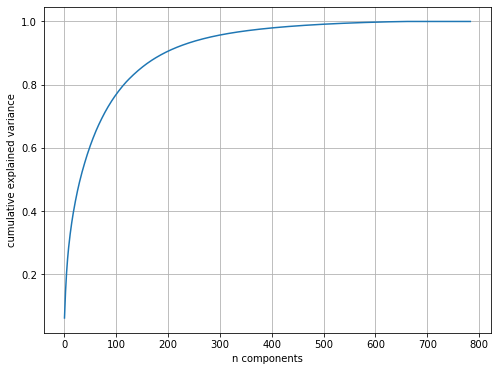

In [50]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_explained)
plt.xlabel("n components")
plt.ylabel("cumulative explained variance")
plt.grid()
plt.show()
